# Energy Loads: Visually Exploring the Data
## Author - Geoff Ball

### Introduction

The following notebook used the EnergyEfficiencyData dataset to visually explore some of the factors related to the energy load of the buildings with respect to heating and cooling.  While many methods are available, I rely heavily on violin plots here as they convey a great deal of information in a compact, easy to understand format.

To keep the notebook relatively short, I have only included highlights, and this should not be viewed as an exhaustive look at the data set.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/EnergyEfficiencyData.csv"

In [3]:
Buildings = pd.read_csv(fileName)

## Descriptive Statistics

The following table contains descriptive  statistics for the Buildings dataset.  The data includes observations of building attributes as well as measurements of the heating and cooling loads of the building

In [4]:
# Get discriptive statistics
Buildings.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


The dataset contains 768 observations and ten variables.  There is no missing data.  The variables of interest are _Heating Load_ and _Cooling Load_, they appear to have similar means, standard deviations, and ranges, the distributions appear in the section below.

One additional item not included in the descriptive statistics above, with the exception of our variables of interest, most variables take on a limited number of values.  The table below shows the number of unique values for each variable and we can see that the numbers are small.  For instance, _Overall Height_ only takes on two values, $3.5$ and $7.0$.

| Variable | # Unique |
| -------- | -------- |
| Relative Compactness | 12 |
| Surface Area | 12 |
| Wall Area | 7 |
| Roof Area | 4 |
| Overall Height | 2 |
| Orientation | 4 |
| Glazing Area | 4 |
| Glazing Area Distribution | 6 |
| Heating Load | 586 |
| Cooling Load | 636 |




##  Distribution of Heating and Cooling Load

It is instructive to look at the distributions of our variables of interest.  We have two here, _Heating Load_ and _Cooling Load_.  The plots below are histograms of our dependent variables with a density plot overlaying the histogram.  We immediately notice a couple of interesting aspects. 

1. While they are not identical, their shapes are strikingly similar.  Suggesting that relationships between our explanatory variables and each of our variables of interest may be similar.
2. Booth distributions are bimodal.  Since relationships with some variables may be obscured by this shape, our first task should be to find something that accounts for this shape.  

Text(0, 0.5, 'Count')

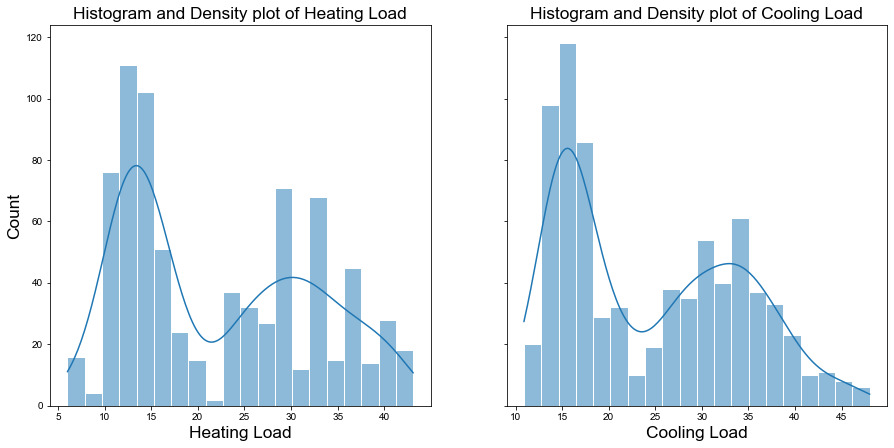

In [5]:
# Set up the axis for side by side plots
fig, ax = plt.subplots(1,2, sharey = True, figsize=(15,7))
sns.set_style("whitegrid")

# Plot 1 (left)
# Create and label a histogram with a kernal density overlay for Heating Load
sns.histplot(Buildings, x = 'Heating Load', bins = 20, kde = True, ax = ax[0])
ax[0].set_title('Histogram and Density plot of Heating Load', \
            fontsize = 'xx-large')# Give the plot a main title
ax[0].set_xlabel('Heating Load', fontsize = 'xx-large')# Set text for the x axis
ax[0].set_ylabel('Count', fontsize = 'xx-large')# Set text for y axis

# Plot 2 (right)
# Create and label a histogram with a kernal density overlay for Cooling Load
sns.histplot(Buildings, x = 'Cooling Load', bins = 20, kde = True, ax = ax[1])
ax[1].set_title('Histogram and Density plot of Cooling Load', \
            fontsize = 'xx-large')# Give the plot a main title
ax[1].set_xlabel('Cooling Load', fontsize = 'xx-large')# Set text for the x axis
ax[1].set_ylabel('Count', fontsize = 'xx-large')# Set text for y axis

## Accounting for the shape

An exploration of our potential, explanatory variables reveals a strong candidate: _Overall Height_ contains only two unique values and the dataset is evenly divided between the short and tall buildings.  In the violin plots below we can see what happens when we condition _Heating Load_ and _Cooling Load_ on _Overall Height_.

In both plots, we can see that the distribution for the shorter buildings is almost entirely below the distribution for the taller buildings.  With very little overlap, it does appear that we have found the culprit for the bimodal distributions seen above.

Text(0, 0.5, 'Cooling Load')

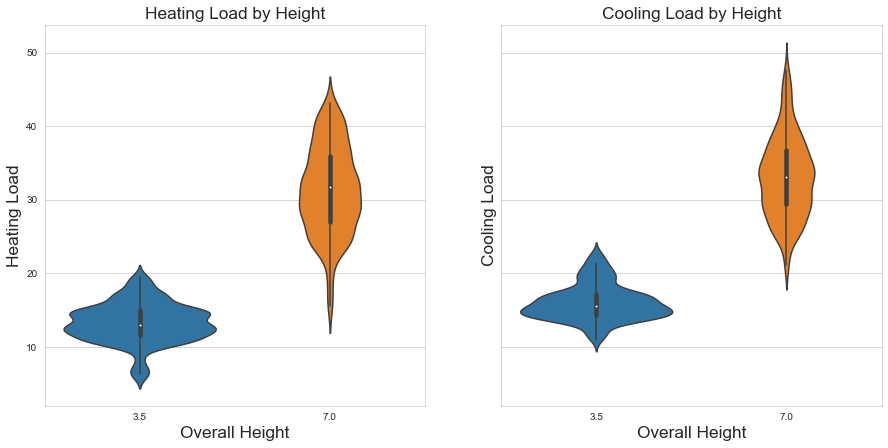

In [6]:
# Set up the axis for side by side plots
fig, ax = plt.subplots(1,2, sharey = True, figsize=(15,7))
sns.set_style("whitegrid")

# Plot 1 (left)
# Create and label a violin plot for Heating Load by height
sns.violinplot(x = 'Overall Height', y = 'Heating Load', \
            data = Buildings, ax = ax[0])
ax[0].set_title('Heating Load by Height', \
            fontsize = 'xx-large')# Give the plot a main title
ax[0].set_xlabel('Overall Height', fontsize = 'xx-large')# Set text for the x axis
ax[0].set_ylabel('Heating Load', fontsize = 'xx-large')# Set text for y axis

# Plot 2 (right)
# Create and label a violin plot for Cooling Load by height
sns.violinplot(x = 'Overall Height', y = 'Cooling Load', \
            data = Buildings, ax = ax[1])
ax[1].set_title('Cooling Load by Height', \
            fontsize = 'xx-large')# Give the plot a main title
ax[1].set_xlabel('Overall Height', fontsize = 'xx-large')# Set text for the x axis
ax[1].set_ylabel('Cooling Load', fontsize = 'xx-large')# Set text for y axis

## Further Relationships: Part 1

Now that we have potentially dealt with the bimodal distribution, we can look at other variables to see what relationship they may have with _Heating Load_ and _Cooling Load_.  While there are several candidates, one in particular stands out, _Glazing Area_.

In each of the two plots below, the four values of _Glazing Area_ are represented by colors and short buildings are on the left of each plot and tall building on the right.  _Heating Load_ and _Cooling Load_ are on the vertical axis of each plot.  In both plots below it can be seen that, while there is quite a bit of overlap, there is generally a positive relationship between _Glazing Area_ and our efficiency measures.  As _Glazing Area_ increases, so does the heating and cooling load, for both short and tall buildings.  While this relationship is present when not conditioning on height, it becomes much more pronounced after controlling for height.

Text(0, 0.5, 'Cooling Load')

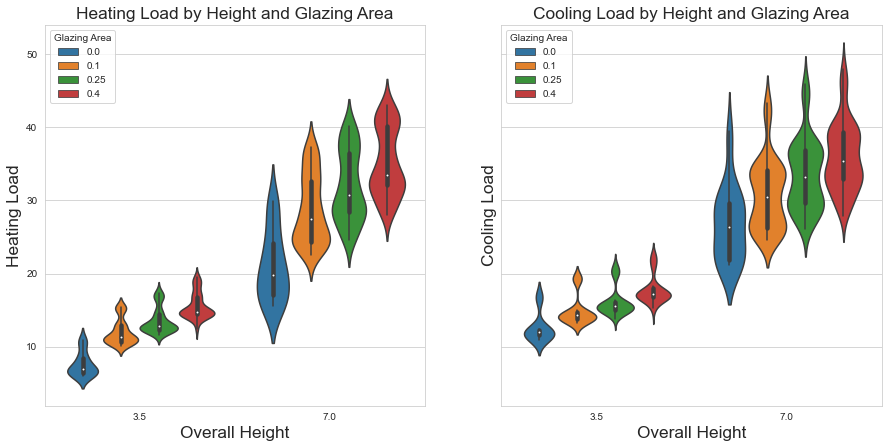

In [7]:
# Set up the axis for side by side plots
fig, ax = plt.subplots(1,2, sharey = True, figsize=(15,7))
sns.set_style("whitegrid")

# Plot 1 (left)
# Create and label a violin plot for Heating Load by height and Glazing Area
sns.violinplot(x = 'Overall Height', y = 'Heating Load', \
        hue = 'Glazing Area', data = Buildings, ax = ax[0])
ax[0].set_title('Heating Load by Height and Glazing Area', \
        fontsize = 'xx-large')# Give the plot a main title
ax[0].set_xlabel('Overall Height', fontsize = 'xx-large')# Set text for the x axis
ax[0].set_ylabel('Heating Load', fontsize = 'xx-large')# Set text for y axis
ax[0].legend(loc = 'upper left', title = "Glazing Area")# Move legend from default upper right position 

# Plot 2 (right)
# Create and label a violin plot for Cooling Load by height and Glazing Area
sns.violinplot(x = 'Overall Height', y = 'Cooling Load', \
        hue = 'Glazing Area', data = Buildings, ax = ax[1])
ax[1].set_title('Cooling Load by Height and Glazing Area', \
        fontsize = 'xx-large')# Give the plot a main title
ax[1].set_xlabel('Overall Height', fontsize = 'xx-large')# Set text for the x axis
ax[1].set_ylabel('Cooling Load', fontsize = 'xx-large')# Set text for y axis

## Further Relationships: Part 2

While we have proven nothing, we have uncovered two variables worthy of further exploration.  To explore further it makes sense to look at short and tall buildings separately, the following code splits the data in a way that will make that possible.

In [8]:
Short_Buildings = Buildings[Buildings['Overall Height'] == 3.5]
Tall_Buildings = Buildings[Buildings['Overall Height'] == 7]

### Short Buildings

Since we suspect that _Glazing Area_ is important, perhaps we can find something interesting within _Glazing Area_.  The plots below are only for short buildings, on the horizontal axis, they are divided into groups by _Glazing Area_ and the colors represent _Surface Area_.  

Although not as clean as the previous plots, we again see something approaching a positive relationship.  However, we should take a moment to acknowledge some specific points.  First of all, across all _Glazing Areas_ for both heating and cooling, the _Surface Area_ of $784$ represents a deviation from the pattern.  The heating and cooling load distributions are far above their nearest neighbors to both the left and right.  Additionally, while the _Surface Area_ of $808.5$ is generally in line with the positive relationship seen in _Heating Load_, in _Cooling Load_ the distribution at that value dips slightly across all _Glazing Areas_.

Text(0, 0.5, 'Cooling Load')

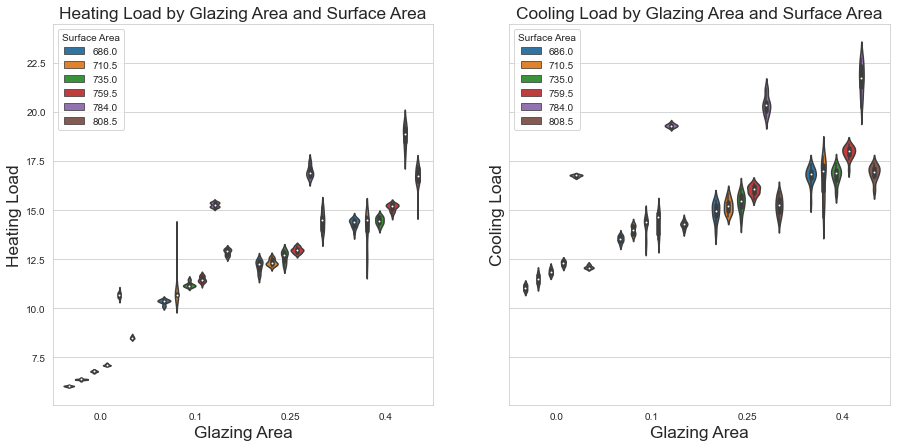

In [9]:
# Set up the axis for side by side plots
i = 'Surface Area'
fig, ax = plt.subplots(1,2, sharey = True, figsize=(15,7))
sns.set_style("whitegrid")

# Plot 1 (left)
# Create and label a violin plot for Heating Load by height (Short), Glazing Area, and Surface Area
sns.violinplot(x = 'Glazing Area', y = 'Heating Load', \
            hue = i, data = Short_Buildings, ax = ax[0])
ax[0].set_title(f'Heating Load by Glazing Area and {i}', \
            fontsize = 'xx-large') # Give the plot a main title
ax[0].set_xlabel('Glazing Area', fontsize = 'xx-large')# Set text for the x axis
ax[0].set_ylabel('Heating Load', fontsize = 'xx-large')# Set text for y axis
ax[0].legend(loc = 'upper left', title = i)# Move legend from default upper right position 

# Plot 2 (right)
# Create and label a violin plot for Cooling Load by height (Short), Glazing Area, and Surface Area
sns.violinplot(x = 'Glazing Area', y = 'Cooling Load', \
            hue = i, data = Short_Buildings, ax = ax[1])
ax[1].set_title(f'Cooling Load by Glazing Area and {i}', \
            fontsize = 'xx-large')# Give the plot a main title
ax[1].set_xlabel('Glazing Area', fontsize = 'xx-large')# Set text for the x axis
ax[1].set_ylabel('Cooling Load', fontsize = 'xx-large')# Set text for y axis

### Tall Buildings

Now we come to the first evidence that the relationship between heating and cooling load, and other variables.  The plots below are constructed identically to the ones above, except that plots are only for tall buildings.  What becomes immediately clear is that the distributions do not follow the same pattern as they do for short buildings.  While there is a repeated pattern, there is not the apparent relationship, within each _Glazing Area_, that we see for short buildings.  Furthermore, the distributions between _Heating Load_ and _Cooling Load_ show significant differences, with the distributions of _Cooling Load_ appearing to have a much higher variance.  These differences are something to keep in mind later when we attempt to build a model.

Text(0, 0.5, 'Cooling Load')

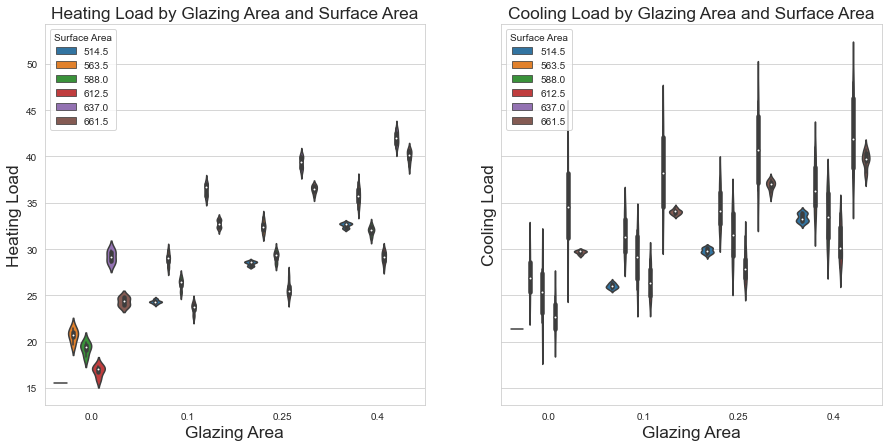

In [10]:
# Set up the axis for side by side plots
i = 'Surface Area' # String vareiable to easily change and test differnt features
fig, ax = plt.subplots(1,2, sharey = True, figsize=(15,7))
sns.set_style("whitegrid")

# Plot 1 (left)
# Create and label a violin plot for Heating Load by height (Tall), Glazing Area, and Surface Area
sns.violinplot(x = 'Glazing Area', y = 'Heating Load', \
            hue = i, data = Tall_Buildings, ax = ax[0])
ax[0].set_title(f'Heating Load by Glazing Area and {i}', \
            fontsize = 'xx-large')# Give the plot a main title
ax[0].set_xlabel('Glazing Area', fontsize = 'xx-large')# Set text for the x axis
ax[0].set_ylabel('Heating Load', fontsize = 'xx-large')# Set text for y axis
ax[0].legend(loc = 'upper left', title = i)# Move legend from default upper right position 

# Plot 2 (right)
# Create and label a violin plot for Cooling Load by height (Tall), Glazing Area, and Surface Area
sns.violinplot(x = 'Glazing Area', y = 'Cooling Load', \
            hue = i, data = Tall_Buildings, ax = ax[1])
ax[1].set_title(f'Cooling Load by Glazing Area and {i}', \
            fontsize = 'xx-large')# Give the plot a main title
ax[1].set_xlabel('Glazing Area', fontsize = 'xx-large')# Set text for the x axis
ax[1].set_ylabel('Cooling Load', fontsize = 'xx-large')# Set text for y axis

## Three Key Points Summary

Given the preliminary exploration of the data, we have a few takeaways.

1. The distribution for both _Heating Load_ and _Cooling Load_ is bimodal, it appears that the two peaks can be divided by the height of the buildings.

2. Once height is controlled for, _Glazing Area_ shows a positive relationship with heating and cooling load.

3. _Surface Area_ also shows a relationship within _Glazing Area_, however that relationship appears to vary based on height and whether we are looking at heating or cooling.


### References

1. Code for the plots was modified from the _Data Exploration_ lab assignment.

2. Modifying the plots to show side by side was done with help from the webpage: https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

## Appendix
### A Further Thought on the Above Distributions

It is worth keeping in mind that as we drill down into the data, each time we add a condition, the resulting distributions are made up of a smaller number of observations.  If the number of observations becomes too small, the power of our insights also diminishes. For instance, the plots above show distributions of heating and cooling load conditioned on _Overall Height_, _Glazing Area_, and _Surface Area_, three conditions when the data contains only 768 observations.  

The frequency table below reveals that when conditioning on _Overall Height_, _Glazing Area_, and _Surface Area_, most distributions were made up of exactly twenty observations, however when _Glazing Area_ is $0.0$, the distributions contain only four observations.

In [11]:
# Create Frequency Tables
Buildings.loc[:, 'count'] = 1
Buildings[['count', 'Overall Height', 'Surface Area', 'Glazing Area']]\
.groupby(['Glazing Area', 'Overall Height', 'Surface Area']).agg('count')

count
Glazing Area Overall Height Surface Area       
0.00         3.5            686.0             4
                            710.5             4
                            735.0             4
                            759.5             4
                            784.0             4
                            808.5             4
             7.0            514.5             4
                            563.5             4
                            588.0             4
                            612.5             4
                            637.0             4
                            661.5             4
0.10         3.5            686.0            20
                            710.5            20
                            735.0            20
                            759.5            20
                            784.0            20
                            808.5            20
             7.0            514.5            20
                            563.5            20
                            588.0            20
                            612.5            20
                            637.0            20
                            661.5            20
0.25         3.5            686.0            20
                            710.5            20
                            735.0            20
                            759.5            20
                            784.0            20
                            808.5            20
             7.0            514.5            20
                            563.5            20
                            588.0            20
                            612.5            20
                            637.0            20
                            661.5            20
0.40         3.5            686.0            20
                            710.5            20
                            735.0            20
                            759.5            20
                            784.0            20
                            808.5            20
             7.0            514.5            20
                            563.5            20
                            588.0            20
                            612.5            20
                            637.0            20
                            661.5            20